# Analiza slovenskih hribov
Za svojo projektno nalogo bom analizirala podatke o slovenskih hribih, gorah in ostalih t.i. lokacijah, najdenih na [spletni strani hribi.net](https://www.hribi.net/).
Za začetek si oglejmo tabelo z vsemi podatki, urejeno padajoče po priljubljenosti.

In [289]:
import pandas as pd
gore = pd.read_csv("podatki v csv/gore.csv")
gore = gore.rename(
    columns={"st_poti": "število poti", "st_slik": 
    "število slik", "visina": "višina"})
    

In [290]:
gore_s_procenti = gore.rename(columns={"priljubljenost": "priljubljenost (%)"})
gore_s_procenti.sort_values(["priljubljenost (%)", "ogledi"], ascending=False)

,gorovje,ime,ogledi,priljubljenost (%),število poti,število slik,višina,vrsta
299,Julijske Alpe,Triglav,1637409,100,28,42,2864,"vrh, bivak"
869,Kamniško Savinjske Alpe,Grintovec,1156090,100,14,14,2558,vrh
888,Kamniško Savinjske Alpe,Storžič,1146458,100,30,29,2132,vrh
1152,Karavanke,Stol,1142759,100,20,23,2236,vrh
1296,Karavanke,Dom na Kofcah,1084259,100,13,18,1488,"koča, planina, cerkev"
...,...,...,...,...,...,...,...,...
1531,"Pohorje, Dravinjske gorice in Haloze",Izvir Dravinje,39,3,1,2,1460,Ni podana
1574,"Pohorje, Dravinjske gorice in Haloze",Hotel Tisa (Poštarski dom),37,3,1,2,912,koča
2259,"Strojna, Košenjak, Kozjak in Slovenske gorice",Lovsko zavetišče LD Mala Nedelja,30,3,1,1,215,koča
1594,"Pohorje, Dravinjske gorice in Haloze",Sveti Lenart (Koritno),18,2,1,3,745,cerkev


### Vrste lokacij na strani

Ker smo opazili, da se kot vrsta "lokacije na strani" pogosto pojavi nekaj, kar sploh ni hrib ali gora, temveč je le npr. cerkev ali jezero, si želimo pogledati, če so vrhovi sploh najpogostejša vrsta lokacije na spletni strani. Če niso, potem lahko pišemo adminu, naj spletno stran preimenuje v "cerkve.net", "jezera.net" ali karkoli je že primerno.

<Axes: xlabel='vrsta'>

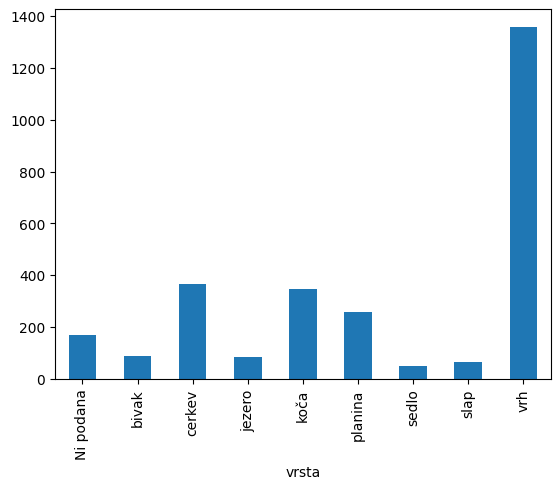

In [291]:
import matplotlib
vrste = pd.read_csv("podatki v csv/vrste.csv")
objekti_po_vrstah = vrste.groupby("vrsta")
objekti_po_vrstah.size().plot.bar()

Očitno nas (ali pa samo mene) je zavedlo dejstvo, da zadnjih nekaj vrstic v prvi tabeli niso vrhovi. Presenetljivo pa je morda dejstvo, da je od 2264 lokacij na spletni strani le slabih 1400 vrhov. Admina pa lahko pustimo pri miru.

### Vrhovi po višini
Zdaj si poglejmo višino vrhov. Kot ponosna državljanka že vrsto let vem, kateri je najvišji slovenski vrh. Šele sedaj pa sem se zavedala, da ne vem, kateri je najnižji...

In [292]:
visine = gore[["ime", "višina", "vrsta"]]
visine.sort_values("višina", ascending=True).head(5)

,ime,višina,vrsta
298,Strunjanske soline,2,Ni podana
297,Ankaran,18,Ni podana
296,Debeli rtič,28,Ni podana
295,Strunjanski križ,53,vrh
294,Vanganelsko jezero,55,jezero


Če upoštevamo vse lokacije, so najnižja slovenska gora Strunjanske soline, z impresivnima dvema metroma nadmorske višine. Če nas to ne zadovolji, pa lahko pogledamo samo lokacije, ki so označene kot vrh:

In [293]:
vrhovi = gore[gore.vrsta >= 'vrh']
vrhovi[["ime", "višina", "vrsta"]].sort_values("višina", ascending=True).head(5)

,ime,višina,vrsta
295,Strunjanski križ,53,vrh
292,Jurjev hrib,109,vrh
291,Črni vrh (Iskra),119,vrh
290,Kamno čelo (Mandrija),193,"vrh, koča"
2019,Lendavski grad (Dolnjelendavski grad),205,vrh


Tukaj dobimo, da je pri 53 metrih nadmorske višine najnižji slovenski vrh Strunjanski križ.

### Priljubljenost

Seveda se vprašamo tudi, ali je višina gore povezana z njeno priljubljenostjo. Intuicija nam pravi, da je. 

Kar pa se tiče merskih napak: četudi so Strunjanske soline popularna slovenska turistična atrakcija, sklepamo da na spletni strani o hribih ne dobijo veliko pozornosti.

Najprej ustvarimo tabelo gor, razvrščenih po priljubljenosti:

In [294]:
gore.sort_values(["priljubljenost", 'višina'], ascending = False)

,gorovje,ime,ogledi,priljubljenost,število poti,število slik,višina,vrsta
299,Julijske Alpe,Triglav,1637409,100,28,42,2864,"vrh, bivak"
303,Julijske Alpe,Mangart,938486,100,8,26,2679,vrh
869,Kamniško Savinjske Alpe,Grintovec,1156090,100,14,14,2558,vrh
881,Kamniško Savinjske Alpe,Ojstrica,957534,100,17,9,2350,vrh
401,Julijske Alpe,Krn,982400,100,12,21,2244,vrh
...,...,...,...,...,...,...,...,...
1531,"Pohorje, Dravinjske gorice in Haloze",Izvir Dravinje,39,3,1,2,1460,Ni podana
1574,"Pohorje, Dravinjske gorice in Haloze",Hotel Tisa (Poštarski dom),37,3,1,2,912,koča
2259,"Strojna, Košenjak, Kozjak in Slovenske gorice",Lovsko zavetišče LD Mala Nedelja,30,3,1,1,215,koča
1594,"Pohorje, Dravinjske gorice in Haloze",Sveti Lenart (Koritno),18,2,1,3,745,cerkev


Sedaj pa še graf:

<Axes: title={'center': 'Priljubljenost v odvisnosti od višine'}, xlabel='višina', ylabel='priljubljenost'>

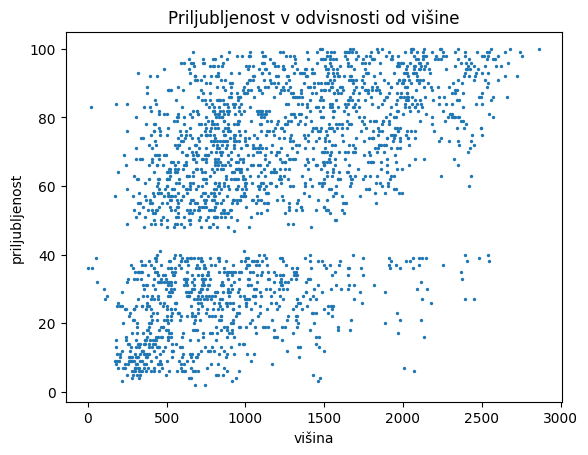

In [295]:
gore.plot.scatter(x = 'višina', y = 'priljubljenost', title = 'Priljubljenost v odvisnosti od višine', s = 2)

Očitno ni posebne korelacije. Se mi pa zdi zanimivo, kako malo gora ima priljubljenost nekje med 40 in 50%. Tu je tabela, da vidimo koliko jih je:

In [296]:
gore[(gore.priljubljenost < 48) & (gore.priljubljenost > 40)]


,gorovje,ime,ogledi,priljubljenost,število poti,število slik,višina,vrsta
1413,Karavanke,Koča na Pikovem,53912,41,8,15,992,"koča, cerkev"
1425,Karavanke,Podgorska planina / Maria Elender Alm,109550,47,1,2,930,planina
1920,Posavsko hribovje in Dolenjska,Orle,60797,41,5,4,458,"vrh, koča"


Priljubljenost med 40 in 48 imajo samo tri gore, gora s priljubljenostjo med 41 in 47 pa očitno sploh ni.
Poglejmo si še korelacijo med priljubljenostjo gora in številom ogledov, ki zgleda kar očitna.

<Axes: title={'center': 'Število ogledov v odvisnosti od priljubljenosti'}, xlabel='priljubljenost', ylabel='ogledi'>

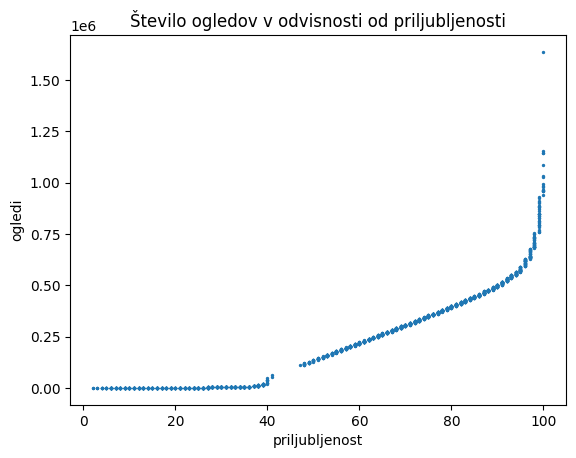

In [297]:
gore.plot.scatter(y = 'ogledi', x = 'priljubljenost', title = 'Število ogledov v odvisnosti od priljubljenosti', s = 2)

Graf, ki spominja na naraščajoči linearni funkciji pri vrednostih priljubljenosti 0-40 in 50-90, ter na eksponentno funkcijo pri 90-100, potrdi našo hipotezo.

Domnevamo tudi, da neuvrščene lokacije niso posebej popularne.

In [298]:
gibanje_neuvrščenih = gore[gore.vrsta <= 'Ni podana']
gibanje_neuvrščenih.sort_values(["priljubljenost", 'višina'], ascending = False)

,gorovje,ime,ogledi,priljubljenost,število poti,število slik,višina,vrsta
1416,Karavanke,Boč,736707,98,14,9,978,Ni podana
144,"Goriško, Notranjsko in Snežniško hribovje",Otliško okno,568938,95,3,10,800,Ni podana
1025,Kamniško Savinjske Alpe,Zavetišče v Hudičevem borštu,551489,94,5,8,1328,Ni podana
275,"Goriško, Notranjsko in Snežniško hribovje",Dolina reke Glinščice / Val Rosandra,542727,93,1,8,320,Ni podana
325,Julijske Alpe,Triglavska vojašnica Viktorja Emanuela III,507817,91,3,6,2520,Ni podana
...,...,...,...,...,...,...,...,...
2230,"Strojna, Košenjak, Kozjak in Slovenske gorice",Puhov muzej (Sakušak),82,6,1,9,334,Ni podana
2247,"Strojna, Košenjak, Kozjak in Slovenske gorice",Skrivališče konjev,74,6,1,3,278,Ni podana
2006,Prekmurje,Budinci,72,5,1,2,285,Ni podana
2253,"Strojna, Košenjak, Kozjak in Slovenske gorice",Kapela sv. Marije (Radehova),61,5,1,4,251,Ni podana


Ker samo iz tabele ni razvidno veliko, lahko izračunamo povprečno priljubljenost in jo primerjamo s celoto.

In [299]:
povprecna_priljubljenost_vseh = round((gore.priljubljenost).mean())
print(povprecna_priljubljenost_vseh)

povprecna_priljubljenost_neuvrščeni = round((gibanje_neuvrščenih.priljubljenost).mean())
print(povprecna_priljubljenost_neuvrščeni)

povprecna_priljubljenost_neuvrščeni < povprecna_priljubljenost_vseh

58
43


True

Neuvrščene lokacije torej očitno res niso preveč popularne. Če bi bile, bi se jim najbrž kdo spomnil dodeliti vrsto.

### Vrednosti v odvisnosti od gorovja

Poglejmo si še odvisnost nekaterih vrednosti od izbire gorovja. Domnevamo, da bodo najvišji vrhovi v Alpah, tj Julijskih Alpah, Kamniško Savinjskih Alpah in Karavankah, ter da bodo tamkajšnji hribi tudi najbolj popularni in ogledani. 

<Axes: ylabel='gorovje'>

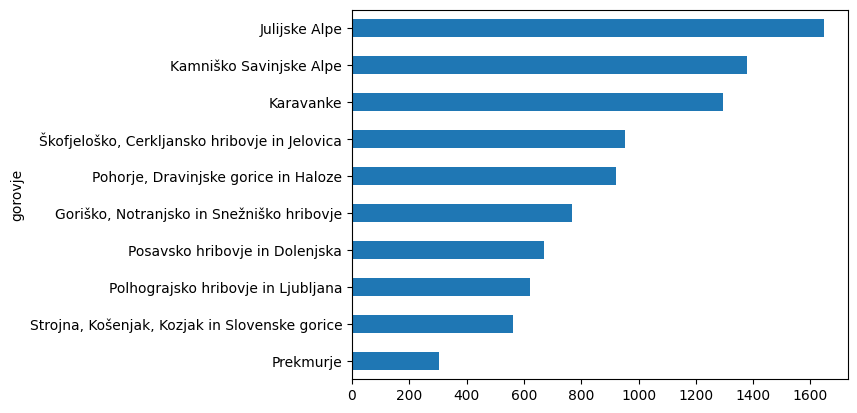

In [300]:
visine_po_gorovjih = gore.groupby(by='gorovje')['višina'].mean()
visine_po_gorovjih.sort_values(inplace=True, ascending=True)
visine_po_gorovjih.plot.barh()

<Axes: ylabel='gorovje'>

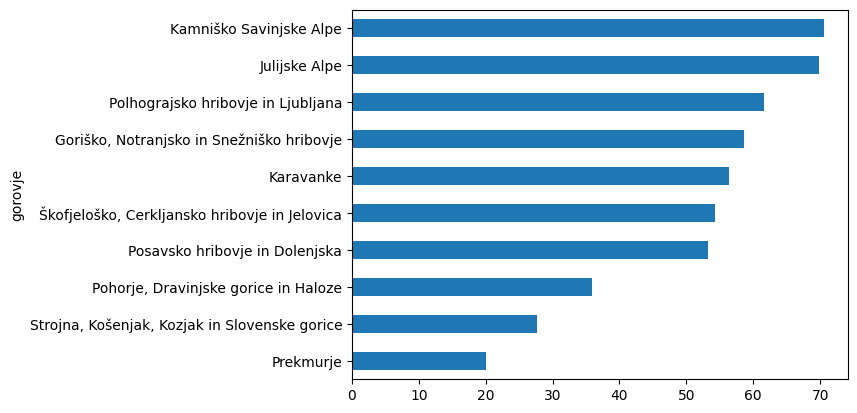

In [301]:
priljubljenost_po_gorovjih = gore.groupby(by='gorovje')['priljubljenost'].mean()
priljubljenost_po_gorovjih.sort_values(inplace=True, ascending=True)
priljubljenost_po_gorovjih.plot.barh()

Prva hipotez očitno velja (to bi lahko vedeli tudi brez grafa). Druga velja samo za Kamniško Savinjske in Julijske Alpe, za Karavanke pa ne.
Zaradi sorazmernosti med priljubljenostjo in številom ogledov lahko domnevamo, da bo graf ogledov glede na gorovje zelo podoben, če ne celo enak. Če bi bil graf linearen, bi lahko takoj zaključili, da je, ker pa ni, pa si ga še oglejmo:

<Axes: ylabel='gorovje'>

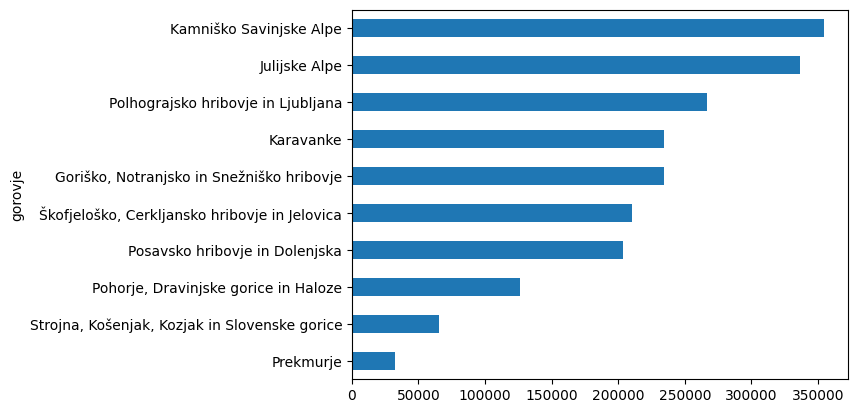

In [302]:
ogledi_po_gorovjih = gore.groupby(by='gorovje')['ogledi'].mean()
ogledi_po_gorovjih.sort_values(inplace=True, ascending=True)
ogledi_po_gorovjih.plot.barh()

Graf je skoraj enak, le mesti Karavank in Goriškega, Notranjskega in Snežniškega hribovja sta zamenjani. 

### Lahki izleti

Osebno imam hribe rada, ampak ker sem se letos celo poletje samo učila za izpite, sem izgubila kondicijo.
Sedaj me zanima, kateri hribi so optimalni za osebo v takem stanju - da so čim nižji, a da so hkrati izleti nanje čim boljši (recimo, da kvaliteto izleta definira priljubljenost hriba).

Za to bom uvedla t.i. "koeficient lenobe", priljubljenost proti višini.

Ob prvem prikazu tabele le-ta pokaže samo lokacije z zelo majhno nadmorsko višino, ki niso vrhovi. Poskusimo se omejiti samo na vrhove.

In [303]:
vrhovi_kopija = vrhovi.copy()
vrhovi_kopija["koeficient lenobe"] = vrhovi_kopija.priljubljenost / vrhovi_kopija.višina
vrhovi_kopija["izboljšan koeficient lenobe"] = (((vrhovi_kopija.priljubljenost) ** 10) / vrhovi_kopija.višina) * (10 ** (-16))
vrhovi_kopija.sort_values(["izboljšan koeficient lenobe"], ascending=False).round({'koeficient lenobe': 2, 'izboljšan koeficient lenobe': 2}).head(5)

,gorovje,ime,ogledi,priljubljenost,število poti,število slik,višina,vrsta,koeficient lenobe,izboljšan koeficient lenobe
2014,Prekmurje,Rotunda sv. Nikolaja (Selo),361573,76,4,11,251,"vrh, koča, cerkev",0.30,2.56
2222,"Strojna, Košenjak, Kozjak in Slovenske gorice",Zavrh v Slovenskih goricah,374643,78,4,12,370,"vrh, koča",0.21,2.25
861,Julijske Alpe,Kozlov rob,378148,78,2,8,426,vrh,0.18,1.96
1722,Polhograjsko hribovje in Ljubljana,Ljubljanski grad,468176,87,5,10,376,"vrh, koča",0.23,1.70
1719,Polhograjsko hribovje in Ljubljana,Cankarjev vrh (Rožnik),532666,92,4,9,394,"vrh, koča, cerkev",0.23,1.66


Od tu lahko takoj vidimo, da sta idealna hriba za moje izboljševanje kondicije Ljubljanski Grad ter Rožnik, ki sta mi blizu.
Če bi živela kje drugje v Sloveniji pa bi morda imela še več sreče. Poglejmo še, v katerem od hribovij je največ primernih vrhov, tj. takih, ki imajo izboljšan koeficient nad 0.8:

<Axes: >

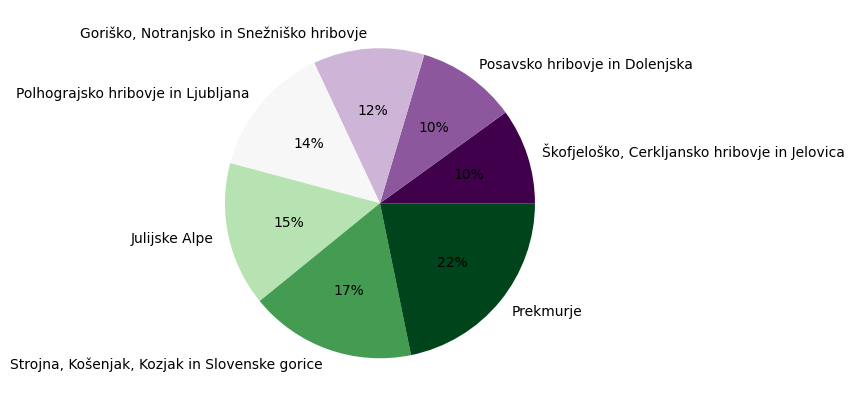

In [304]:
primerni = vrhovi_kopija[vrhovi_kopija["izboljšan koeficient lenobe"] > 0.8]

primerni_v_gorovjih = primerni.groupby(by='gorovje')['izboljšan koeficient lenobe'].mean()
primerni_v_gorovjih.sort_values(inplace=True, ascending=True)

chart = primerni_v_gorovjih.plot.pie(figsize=(5,10), autopct='%1.0f%%', colormap="PRGn")
chart.set_ylabel('')
chart
